In [1]:
from itertools import islice
import numpy as np
from numpy.random import RandomState
from numpy.polynomial import Polynomial
from matplotlib.pyplot import plot
from ipywidgets import interact, IntSlider

In [2]:
from longstaff_schwartz.stochastic_process import GeometricBrownianMotion

In [3]:
rnd = RandomState(seed=1234)

In [4]:
t = np.linspace(0, 5, 12*5)
n = 50
r = 0.0
sigma = 0.15
gbm = GeometricBrownianMotion(mu=r, sigma=sigma)

In [5]:
X = gbm.simulate(t, n, rnd)
X.shape

(60, 50)

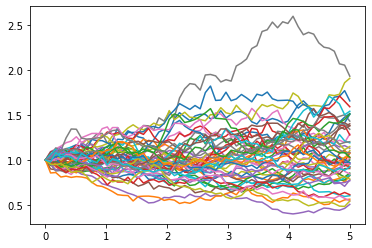

In [6]:
plot(t, X);

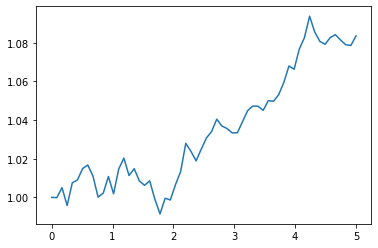

In [7]:
plot(t, X.mean(axis=1));

In [8]:
def exercise_value(s):
    return np.maximum(s - 1, 0)

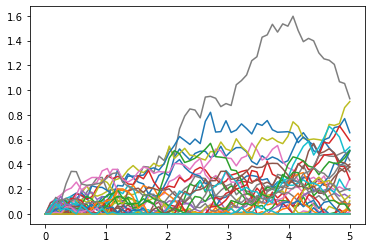

In [9]:
plot(t, exercise_value(X));

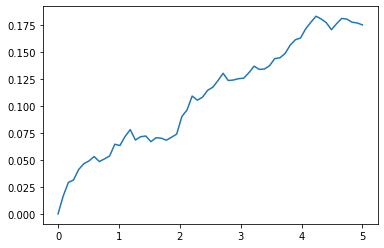

In [10]:
plot(t, exercise_value(X).mean(axis=1));

In [11]:
p = Polynomial([1, 1, 1, 1])
p

Polynomial([1., 1., 1., 1.], domain=[-1,  1], window=[-1,  1])

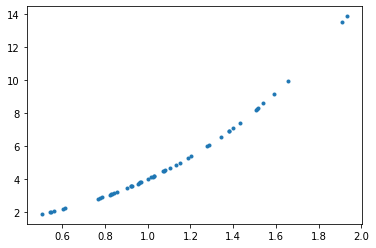

In [12]:
x = X[-1, :]
plot(x, p(x), '.');

In [13]:
def fit(x, y):
    return Polynomial.fit(x, y, 3)

In [14]:
p = fit(x, exercise_value(x))
p

Polynomial([ 0.20778097,  0.64526585,  0.27951733, -0.19790102], domain=[0.50589696, 1.93071881], window=[-1.,  1.])

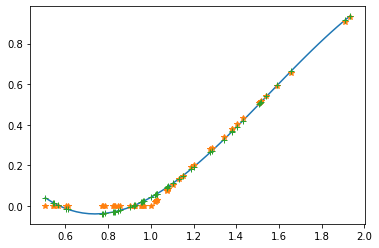

In [15]:
_x = np.linspace(np.min(x), np.max(x))
plot(_x, p(_x));
plot(x, exercise_value(x), '*');
plot(x, p(x), '+');

In [16]:
def backward_regression(fit, exercise_value, X):
    total = exercise_value(X[-1, :])
    for i in reversed(range(1, X.shape[0] - 1)):
        x = X[i, :]
        fitted = fit(x, total)
        exercise = exercise_value(x)
        continuation = fitted(x)
        total = np.maximum(exercise, continuation)
        yield total, x, fitted, continuation, exercise

In [17]:
bw_regr_steps = list(backward_regression(fit, exercise_value, X))

In [18]:
@interact(n_steps=IntSlider(min=1, max=X.shape[0]-2, value=1))
def step(n_steps):
    total, x, fitted, continuation, exercise = bw_regr_steps[n_steps]
    plot(x, total, '+');
    plot(x, continuation, '*');
    plot(x, exercise, '.');

interactive(children=(IntSlider(value=1, description='n_steps', max=58, min=1), Output()), _dom_classes=('widg…

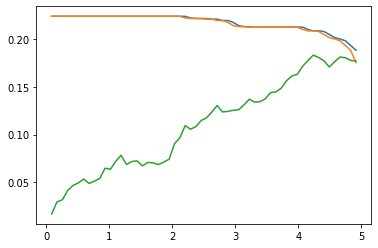

In [19]:
plot(t[1:-1], [np.average(total) for total, *_ in reversed(bw_regr_steps)]);
plot(t[1:-1], [np.average(continuation) for total, x, fitted, continuation, exercise in reversed(bw_regr_steps)]);
plot(t[1:-1], [np.average(exercise) for total, x, fitted, continuation, exercise in reversed(bw_regr_steps)]);

In [20]:
for total, x, fitted, continuation, exercise in backward_regression(fit, exercise_value, X):
    print(fitted)

poly([ 0.24870697  0.72455319  0.25431661 -0.27677903])
poly([ 0.2499647   0.73935362  0.3269623  -0.24431512])
poly([ 0.32317295  0.83531724  0.26484419 -0.34298746])
poly([ 0.34678659  0.8728527   0.29664835 -0.31339789])
poly([ 0.36607944  0.92677298  0.30354212 -0.34721072])
poly([ 0.40820444  1.05980059  0.28878965 -0.49540849])
poly([ 0.43999232  1.11031689  0.2872467  -0.53793926])
poly([ 0.44419555  1.07282007  0.31302864 -0.43846331])
poly([ 0.40754299  1.01184792  0.36282458 -0.36821656])
poly([ 0.45559391  1.05934129  0.30951061 -0.41566557])
poly([ 0.51334061  1.12134245  0.27725915 -0.43683517])
poly([ 0.51166551  1.16645413  0.34566664 -0.42545162])
poly([ 0.52918317  1.18179121  0.3277328  -0.43915545])
poly([ 0.49261845  1.03476919  0.33852958 -0.27135838])
poly([ 0.5296593   1.05227391  0.29201542 -0.28309677])
poly([ 0.49451522  0.93155702  0.31268254 -0.15363815])
poly([ 0.50819717  0.93163946  0.30097811 -0.15405265])
poly([ 0.42743966  0.794515    0.37132916 -0.010

In [21]:
assert np.average(total) >= np.average(exercise_value(X[-1, :]))
print(np.average(total))
print(np.average(exercise_value(X[-1, :])))

0.2242171554988672
0.1753498176108298
